In [5]:
#Data processing
import pandas as pd

#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
 

In [6]:

df=pd.read_csv(r'C:\Users\grace\Data Science\preprocess_data.csv')
 

In [7]:
#Read data
df

Lemmatized_Comment  Sexual_Type1  \
0                                                 zany             0   
1                                                larry             0   
2                            get gif cannot have phone             0   
3     larry zany sexy niall liam something stupid back             0   
4                                          pretty much             0   
...                                                ...           ...   
6324                                         daisy one             0   
6325              damn really want one booty argentina             0   
6326                               want blue whale one             0   
6327                                            puzzle             0   
6328       rainbow leopard print one love much restock             0   

      Sexual_Type2  Physical_Appearance  Race  Intellectual  General_Hate  
0                0                    0     0             0             0  
1                0                    0     0             0             0  
2                0                    0     0             0             0  
3                0                    0     0             0             0  
4                0                    0     0             0             0  
...            ...                  ...   ...           ...           ...  
6324             0                    0     0             0             0  
6325             0                    0     0             0             0  
6326             0                    0     0             0             0  
6327             0                    0     0             0             0  
6328             0                    0     0             0             0  

[6329 rows x 7 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6329 entries, 0 to 6328
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Lemmatized_Comment   6329 non-null   object
 1   Sexual_Type1         6329 non-null   int64 
 2   Sexual_Type2         6329 non-null   int64 
 3   Physical_Appearance  6329 non-null   int64 
 4   Race                 6329 non-null   int64 
 5   Intellectual         6329 non-null   int64 
 6   General_Hate         6329 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 346.2+ KB


# Summary Statistics 

In [23]:
import pandas as pd

columns = ['Sexual_Type1', 'Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']

# Count the occurrences of 'not cyberbullying' and 'cyberbullying'
not_cyberbullying_count = ((df[columns] == 0).all(axis=1)).sum()
cyberbullying_count = len(df) - not_cyberbullying_count

cyberbullying_type_count = df[columns].sum()

# Proportions
proportion_not_cyberbullying = not_cyberbullying_count / len(df)
proportion_cyberbullying = cyberbullying_count / len(df)

# Display summary statistics
overall_sum_stats = pd.DataFrame({
    'Count of Not Cyberbullying': [not_cyberbullying_count],
    'Proportion of Not Cyberbullying': [proportion_not_cyberbullying],
    'Count of Cyberbullying': [cyberbullying_count],
    'Proportion of Cyberbullying': [proportion_cyberbullying],
})

overall_sum_stats.index = ['Overview']
overall_sum_stats


Count of Not Cyberbullying  Proportion of Not Cyberbullying  \
Overview                        5402                         0.853531   

          Count of Cyberbullying  Proportion of Cyberbullying  
Overview                     927                     0.146469

In [24]:
import pandas as pd

columns = ['Sexual_Type1', 'Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']

# Count the occurrences of 1s and 0s
count_1s = df[columns].sum()
count_0s = len(df) - count_1s

# Calculate proportions
proportion_1s = count_1s / len(df)
proportion_0s = count_0s / len(df)

# Create summary statistics DataFrame
summary_stats = pd.DataFrame({
    'Count of Cyberbullying Classified': count_1s,
    'Proportion of Cyberbullying Classified': proportion_1s,
    'Count of Not Cyberbullying': count_0s,
    'Proportion of Comments Not Cyberbullying': proportion_0s,
    'Mode': df[columns].mode().iloc[0]
})

summary_stats


Count of Cyberbullying Classified  \
Sexual_Type1                                       225   
Sexual_Type2                                       106   
Physical_Appearance                                152   
Race                                               105   
Intellectual                                       151   
General_Hate                                       526   

                     Proportion of Cyberbullying Classified  \
Sexual_Type1                                       0.035551   
Sexual_Type2                                       0.016748   
Physical_Appearance                                0.024016   
Race                                               0.016590   
Intellectual                                       0.023858   
General_Hate                                       0.083109   

                     Count of Not Cyberbullying  \
Sexual_Type1                               6104   
Sexual_Type2                               6223   
Physical_Appearance                        6177   
Race                                       6224   
Intellectual                               6178   
General_Hate                               5803   

                     Proportion of Comments Not Cyberbullying  Mode  
Sexual_Type1                                         0.964449     0  
Sexual_Type2                                         0.983252     0  
Physical_Appearance                                  0.975984     0  
Race                                                 0.983410     0  
Intellectual                                         0.976142     0  
General_Hate                                         0.916891     0

The overall summary statistic, which includes only the count and proportion revealed that 85.35% of the comments were labeled as not cyberbullying while 14.65% of the comments were labeled as cyberbullying. The summary statistics of the different categories showed that the category with the highest frequency of cyberbullied comments was the “General Hate” type. Of the specific features, the Sexual_Type1 was the most frequently occurring comment. Despite the count of cyberbullying in the overall summary statistic being 927, the total count for the different cyberbullying types turned out to be 1,265. The discrepancy between the count of cyberbullying in the overall summary and the total count in the detailed category breakdown suggests overlapping or multiple labeling of cyberbullying types in some comments. This complexity highlights the challenge of classifying comments into distinct categories, as some instances may exhibit characteristics that align with multiple cyberbullying types.


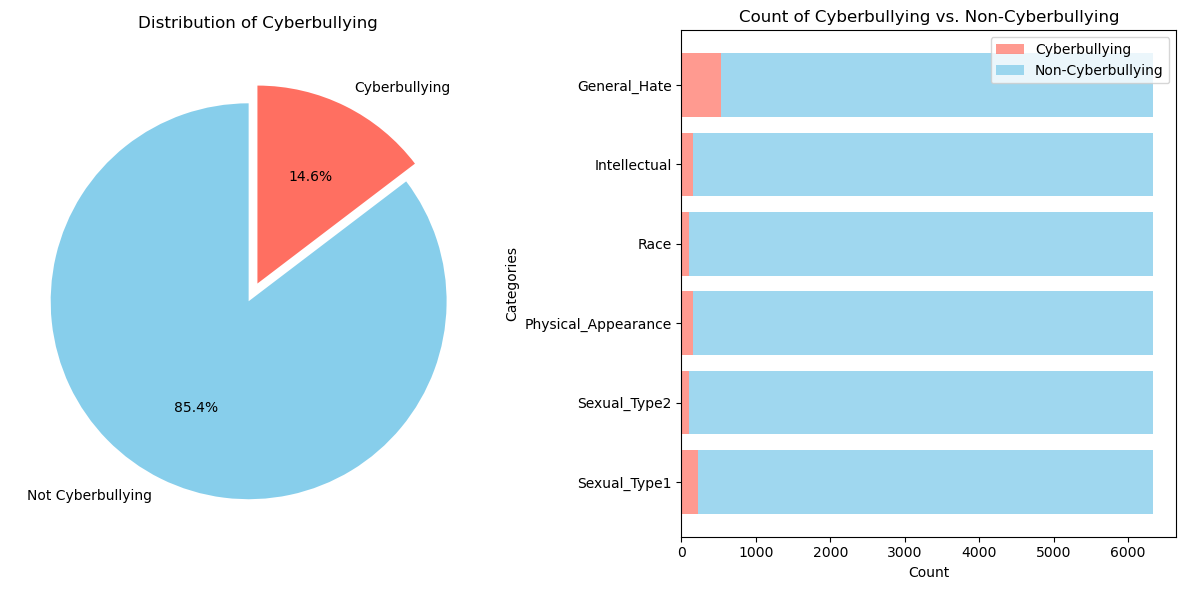

In [61]:
# Pie chart
labels_pie = ['Not Cyberbullying', 'Cyberbullying']
sizes_pie = [overall_sum_stats['Count of Not Cyberbullying'][0], overall_sum_stats['Count of Cyberbullying'][0]]
colors_pie = ['#87CEEB', '#FF6F61']
explode_pie = (0.1, 0)   

plt.figure(figsize=(12, 6)) 

plt.subplot(1, 2, 1)   
plt.pie(sizes_pie, explode=explode_pie, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cyberbullying')

# Bar chart 
categories = ['Sexual_Type1', 'Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']
colors_cyberbullying = ['#FF6F61', '#FF6F61', '#FF6F61', '#FF6F61', '#FF6F61', '#FF6F61']
colors_non_cyberbullying = ['#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB', '#87CEEB']

counts_cyberbullying = [225, 106, 152, 105, 151, 526]
counts_non_cyberbullying = [6104, 6223, 6177, 6224, 6178, 5803]

plt.subplot(1, 2, 2)  
plt.barh(categories, counts_cyberbullying, label='Cyberbullying', color=colors_cyberbullying, alpha=0.7)
plt.barh(categories, counts_non_cyberbullying, left=counts_cyberbullying, label='Non-Cyberbullying', color=colors_non_cyberbullying, alpha=0.8)

plt.title('Count of Cyberbullying vs. Non-Cyberbullying')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.legend()

plt.tight_layout(w_pad=0)   
plt.show()


The pie chart showcases the overall proportion of cyberbullying, while the stacked bar chart illustrates the isolated categories of cyberbullying types. Together, these visualizations provide insights into the extent of imbalance in this dataset.  

<BarContainer object of 2 artists>

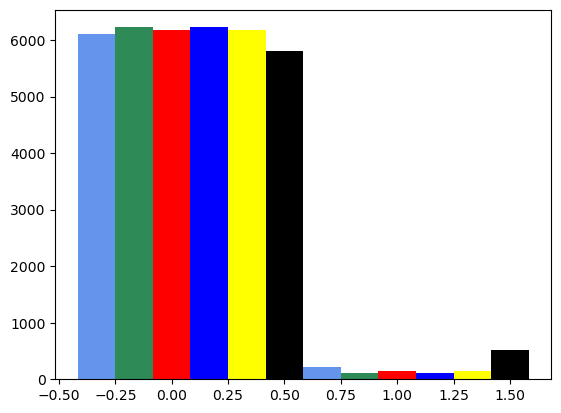

In [11]:
#Histogram 
fig, ax = plt.subplots()

s1_heights, s1_bins = np.histogram(df['Sexual_Type1'],bins=[-0.5,0.5,1.5])
s2_heights, s2_bins = np.histogram(df['Sexual_Type2'], bins=s1_bins)
pa_heights, pa_bins = np.histogram(df['Physical_Appearance'], bins=s2_bins)
r_heights, r_bins = np.histogram(df['Race'], bins=pa_bins)
i_heights, i_bins = np.histogram(df['Intellectual'], bins=r_bins)
gh_heights, gh_bins = np.histogram(df['General_Hate'], bins=i_bins)


width = (s1_bins[1] - s1_bins[0])/6.0

ax.bar(s1_bins[:-1]+width, s1_heights, width=width, facecolor='cornflowerblue')
ax.bar(s2_bins[:-1]+width*2, s2_heights, width=width, facecolor='seagreen')
ax.bar(pa_bins[:-1]+width*3, pa_heights, width=width, facecolor='red')
ax.bar(r_bins[:-1]+width*4, r_heights, width=width, facecolor='blue')
ax.bar(i_bins[:-1]+width*5, i_heights, width=width, facecolor='yellow')
ax.bar(gh_bins[:-1]+width*6, gh_heights, width=width, facecolor='black')

This was not added to the report as the pie chart and bar chart had showcased the imbalanced dataset.

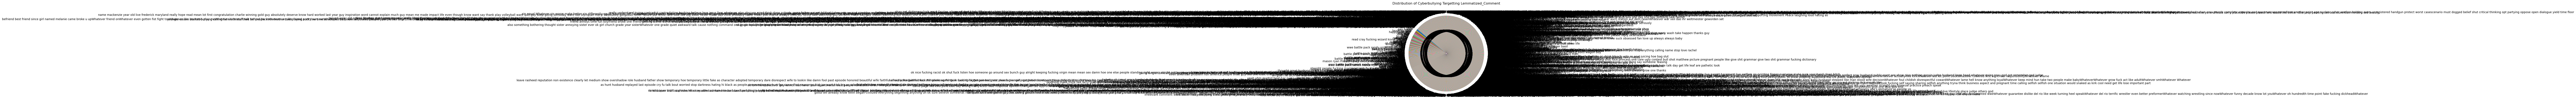

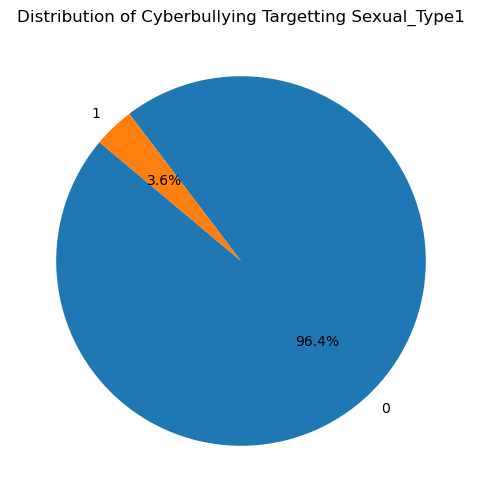

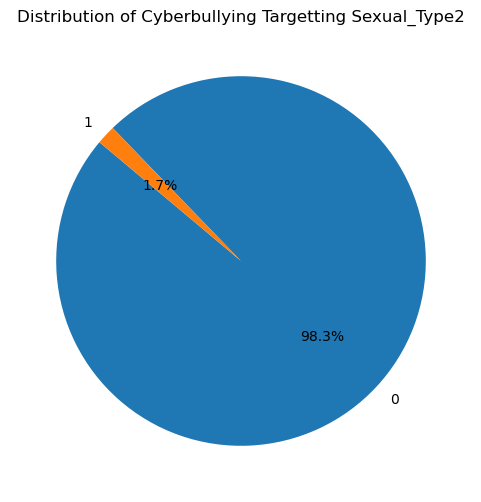

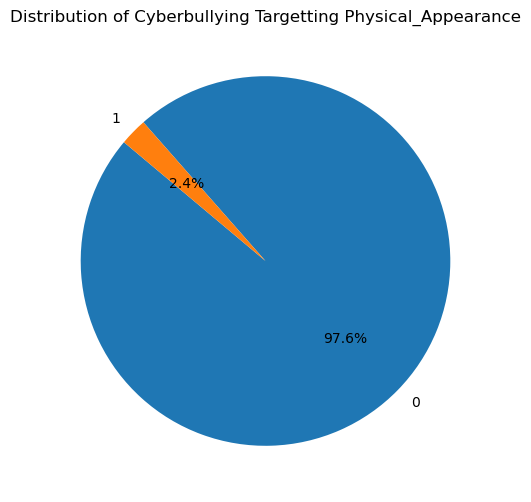

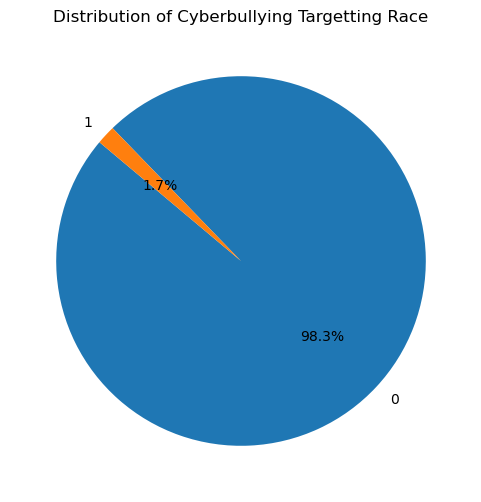

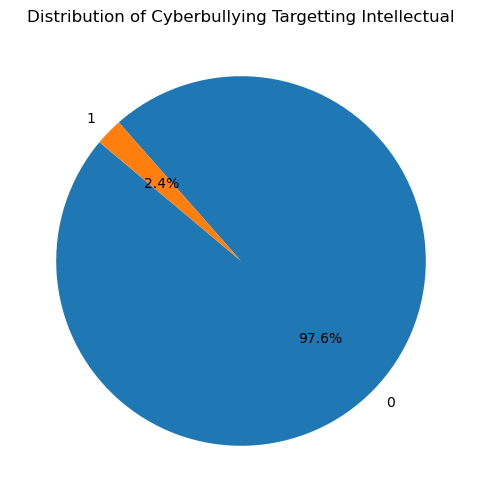

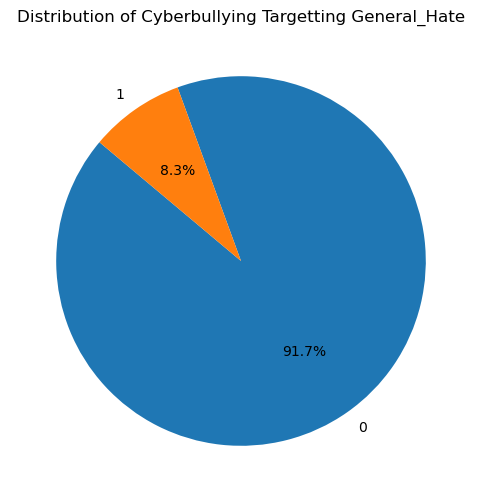

In [65]:
#pie charts 
columns = df.columns

for column in columns:
    count = df[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Distribution of Cyberbullying Targetting {column}")
    plt.show()

This was not added to the report as the pie chart and bar chart had showcased the imbalanced dataset.

# WordCloud of Each Label For Cases Categorized as Cyberbullying

In [67]:
#Variables 
bullied_sexual_type1 = df[(df['Sexual_Type1'] == 1) & (df[['Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']].eq(0).all(axis=1))]
bullied_sexual_type2 = df[(df['Sexual_Type2'] == 1) & (df[['Sexual_Type1', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']].eq(0).all(axis=1))]
bullied_pa = df[(df['Physical_Appearance'] == 1) & (df[['Sexual_Type1','Sexual_Type2', 'Race', 'Intellectual', 'General_Hate']].eq(0).all(axis=1))]
bullied_r = df[(df['Race'] == 1) & (df[['Sexual_Type1','Sexual_Type2', 'Physical_Appearance', 'Intellectual', 'General_Hate']].eq(0).all(axis=1))]
bullied_i = df[(df['Intellectual'] == 1) & (df[['Sexual_Type1', 'Sexual_Type2', 'Physical_Appearance', 'Race', 'General_Hate']].eq(0).all(axis=1))]
bullied_gh = df[(df['General_Hate'] == 1) & (df[['Sexual_Type1', 'Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual']].eq(0).all(axis=1))]

not_cyberbullied = df[df[['Sexual_Type1','Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']].eq(0).all(axis=1)]


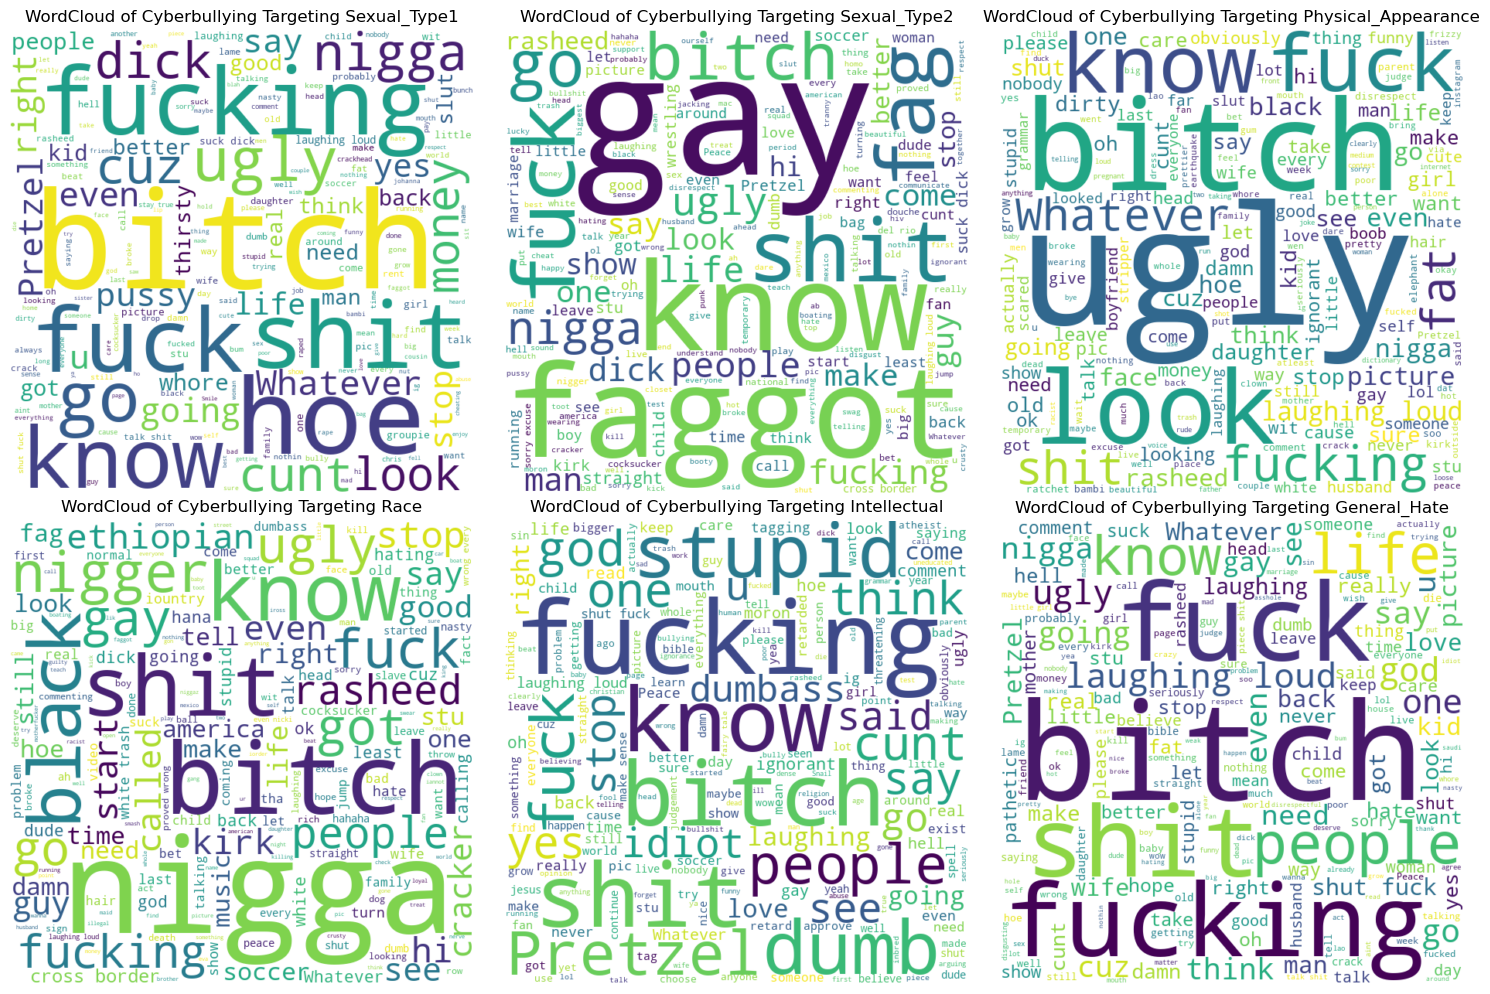

In [32]:

all_text = ' '.join(df['Lemmatized_Comment'])

wordcloud_all = WordCloud(width=600, height=600, background_color='white').generate(all_text)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of All Comments')

categories = ['Sexual_Type1', 'Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']
for i, category in enumerate(categories, start=1):
    text_category = ' '.join(df[df[category] == 1]['Lemmatized_Comment'])
    wordcloud_category = WordCloud(width=600, height=600, background_color='white').generate(text_category)
    
    plt.subplot(2, 3, i)
    plt.imshow(wordcloud_category, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud of Cyberbullying Targeting {category}')

plt.tight_layout()
plt.show()


In [166]:
 
labels = ['Sexual_Type1', 'Sexual_Type2', 'Physical_Appearance', 'Race', 'Intellectual', 'General_Hate']

 
cooccurrence_matrix = pd.DataFrame(index=labels, columns=labels, dtype=int)

 
for col1 in labels:
    for col2 in labels:
        cooccurrence_matrix.loc[col1, col2] = (df[col1] & df[col2]).sum()
 
print("Co-occurrence Matrix:")
cooccurrence_matrix

Co-occurrence Matrix:


Sexual_Type1  Sexual_Type2  Physical_Appearance   Race  \
Sexual_Type1                225.0          20.0                 31.0   17.0   
Sexual_Type2                 20.0         106.0                  9.0   18.0   
Physical_Appearance          31.0           9.0                152.0   19.0   
Race                         17.0          18.0                 19.0  105.0   
Intellectual                 23.0          11.0                 11.0   11.0   
General_Hate                 76.0          32.0                 47.0   37.0   

                     Intellectual  General_Hate  
Sexual_Type1                 23.0          76.0  
Sexual_Type2                 11.0          32.0  
Physical_Appearance          11.0          47.0  
Race                         11.0          37.0  
Intellectual                151.0          50.0  
General_Hate                 50.0         526.0

Text(0.5, 1.0, 'Correlation Heatmap of Cyberbullying Labels')

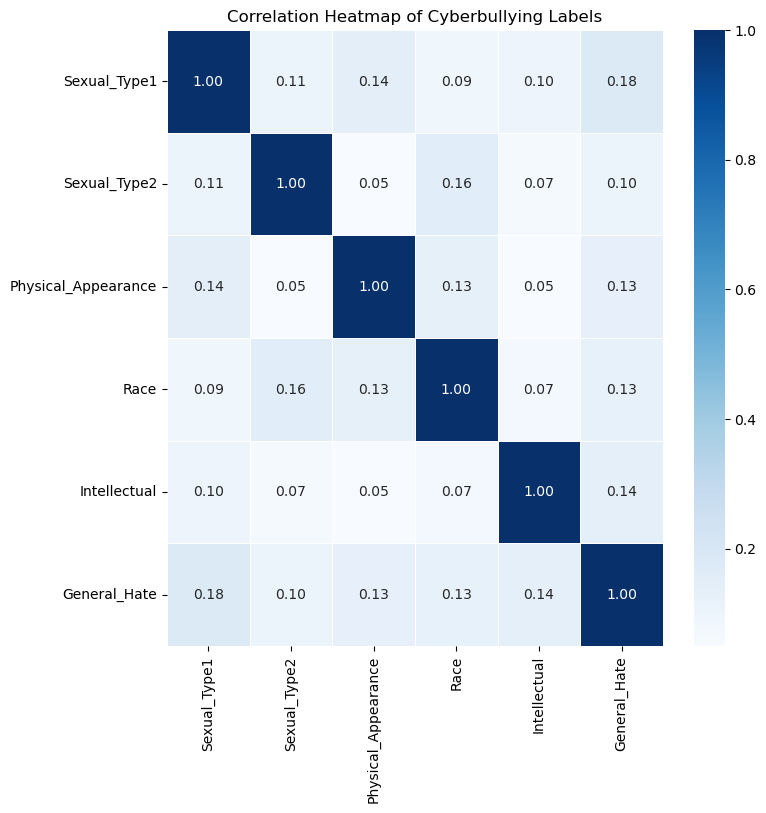

In [38]:

binary_columns = [col for col in columns if df[col].nunique() == 2]

corr_matrix = df[binary_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Cyberbullying Labels')

The co-occurence matrix and correlation heatmap were not added to the report as they do not bring any concrete value. 